In [1]:
"""For a given dataset predict whether customer will exit (Output variable “Exited”) the bank or not using 
artificial neural network"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data1 = data.iloc[:,-1:]
data.drop(['Surname','Exited'], axis = 1, inplace = True)
data = pd.get_dummies(data = data, drop_first = True)
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [3]:
data1.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [4]:
len(data),len(data1)

(10000, 10000)

In [5]:
data.isnull().sum()

RowNumber            0
CustomerId           0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [6]:
data['RowNumber'] = (data['RowNumber'] - data['RowNumber'].mean()) / (data['RowNumber'].std())
data['CustomerId'] = (data['CustomerId'] - data['CustomerId'].mean()) / (data['CustomerId'].std())
data['CreditScore'] = (data['CreditScore'] - data['CreditScore'].mean()) / (data['CreditScore'].std())
data['Age'] = (data['Age'] - data['Age'].mean()) / (data['Age'].std())
data['Tenure'] = (data['Tenure'] - data['Tenure'].mean()) / (data['Tenure'].std())
data['Balance'] = (data['Balance'] - data['Balance'].mean()) / (data['Balance'].std())
data['EstimatedSalary'] = (data['EstimatedSalary'] - data['EstimatedSalary'].mean()) / (data['EstimatedSalary'].std())

In [7]:
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-1.731791,-0.783174,-0.326205,0.293503,-1.041708,-1.225786,1,1,1,0.021885,0,0,0
1,-1.731445,-0.606504,-0.440014,0.198154,-1.387468,0.117344,1,0,1,0.216523,0,1,0
2,-1.731098,-0.995835,-1.536717,0.293503,1.032856,1.332987,3,1,0,0.240675,0,0,0
3,-1.730752,0.144759,0.501496,0.007456,-1.387468,-1.225786,2,0,0,-0.108912,0,0,0
4,-1.730405,0.652626,2.063781,0.388852,-1.041708,0.785689,1,1,1,-0.365258,0,1,0


In [8]:
def split_data(data,data1):
    Training_data = int(0.70 * len(data))
    
    x_train, y_train, x_test, y_test = np.array(data.iloc[0:Training_data,:]), np.array(data1.iloc[0:Training_data,:]), np.array(data.iloc[Training_data:,:]), np.array(data1.iloc[Training_data:,:])

    return x_train, y_train, x_test, y_test

In [9]:
x_train, y_train, x_test, y_test = split_data(data,data1)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7000, 13), (7000, 1), (3000, 13), (3000, 1))

In [11]:
def shape(x,y):
    transform_x = x.shape[0]
    transform_w = x.shape[1]
    return transform_x, transform_w

In [12]:
def initialize(x, y, transform_x, transform_w):
    x = np.reshape(x,(transform_w,transform_x))
    y = np.reshape(y,(1,transform_x))
    
    np.random.seed(0)
    W = np.random.randn(1,transform_w) *0.01
    b = np.zeros((1,1))
    
    parameters = {'W':W, 'b':b}
    return x, y, parameters

In [13]:
def forward_propagation(x, y, parameters):
    W = parameters['W']
    b = parameters['b']
    
    Z = np.dot(W,x) + b

    return Z

In [14]:
def sigmoid(Z):
    sigmoid = 1 / (1 + np.exp(-Z))
    return sigmoid

In [15]:
def backward_propagation(A, x, y):
    dz = A - y
    m = x.shape[1]
    
    dw = (np.dot(x,dz.T))/m
    
    db = (np.sum(dz))/m
    db = np.reshape(db,(1,1))
    
    grads = {'dw':dw, 'db':db}
    return grads

In [16]:
def update(grads,parameters):
    learning_rate = 0.01
    W = parameters['W']
    b = parameters['b']
    
    dw = grads['dw']
    db = grads['db']
    
    W = W - (learning_rate * dw.T)
    b = b - (learning_rate * db)
    
    parameters = {'W':W, 'b':b}
    return parameters

In [17]:
def compute_cost(A, x, y):
    m = x.shape[1]
    L = (y * np.log(A)) +((1-y) * np.log(1-A))
    cost = - ( np.sum(L) / m)
    return cost

In [18]:
def nn_model(x1, y1):
    epoch = 1500
    cost_list = [ ]
    transform_x, transform_w = shape(x1, y1)
    x, y, parameters = initialize(x1, y1, transform_x, transform_w)
    for i in range(epoch):
        Z = forward_propagation(x, y, parameters)
        A = sigmoid(Z)
        cost = compute_cost(A, x, y)
        cost_list.append(cost)
        grads = backward_propagation(A, x, y)
        parameters = update(grads, parameters)
    return parameters, cost_list

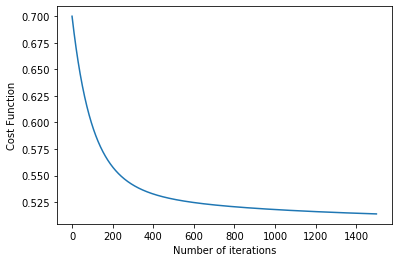

In [19]:
new_parameters, cost_list = nn_model(x_train,y_train)
import matplotlib.pyplot as plt
plt.plot(cost_list)
plt.xlabel('Number of iterations')
plt.ylabel('Cost Function')
plt.show()

In [20]:
def check_prediction(x1, y1, new_parameters):
    transform_x, transform_w = shape(x1, y1)
    x, y, para = initialize(x1, y1, transform_x, transform_w)
    Z1 = forward_propagation(x, y, new_parameters)
    A1 = sigmoid(Z1)
    return A1, y

In [21]:
A1, y = check_prediction(x_test, y_test, new_parameters)
a = np.round(A1)
y = y

In [22]:
def check_accuracy(a, y):
    accuracy = 0
    n = a.shape[1]
    for i in range(len(a[0])):
        if (a[0][i] == y[0][i]):
            accuracy += 1
    acc = (accuracy / n) * 100
    return acc

In [23]:
accuracy = check_accuracy(a,y)
print(accuracy)

80.2
